# Pymaceuticals Inc.
---

### Analysis

Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.
1. From the scatter plot of tumor volume vs. time point shows that the weight increase of the mouse gradually increses the avaerage tumor volume resulting in less effectiveness of the drug.

2. The Capomulin drug regimen was tested on maximum number of mices as seen in the bar plot showing the total number of timepoints for all mice tested for each drug regimen.

3. The pie plot showing the distribution of female versus male mice dipicts that almost equal number of gender was selected for the study.

4. The line plot of tumor volume vs. time point for a mouse treated with Capomulin for the ID l509 shows that the Capomulin drug regimen worked as the total volume of tumor decreases eventually.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_mouse_data= pd.merge(study_results,mouse_metadata, how ='left', on = ["Mouse ID","Mouse ID"])


In [5]:
 #Display the data table for preview

combined_mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
number_of_mice= combined_mouse_data["Mouse ID"].nunique()
number_of_mice


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice =combined_mouse_data.loc[combined_mouse_data.duplicated(subset = ["Mouse ID","Timepoint"]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mouse_id = a


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.1=
Clean_dataframe = combined_mouse_data.loc[combined_mouse_data['Mouse ID'] != 'g989' ] 
Clean_dataframe.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean_dataframe= Clean_dataframe["Mouse ID"].value_counts()
clean_data =len(number_of_mice_clean_dataframe)
clean_data

248

## Summary Statistics

In [11]:
#Summary Statistics¶

In [12]:
mean = Clean_dataframe['Tumor Volume (mm3)'].groupby(Clean_dataframe['Drug Regimen']).mean()
median = Clean_dataframe['Tumor Volume (mm3)'].groupby(Clean_dataframe['Drug Regimen']).median()
var = Clean_dataframe['Tumor Volume (mm3)'].groupby(Clean_dataframe['Drug Regimen']).var()
std = Clean_dataframe['Tumor Volume (mm3)'].groupby(Clean_dataframe['Drug Regimen']).std()
sem = Clean_dataframe['Tumor Volume (mm3)'].groupby(Clean_dataframe['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

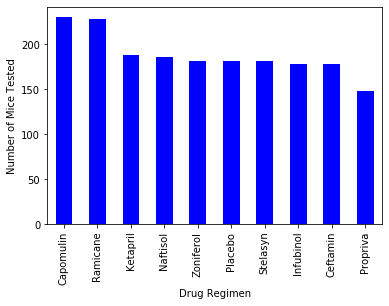

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Mice_count_for_drug_specimen = Clean_dataframe["Drug Regimen"].value_counts()

plot_through_pandas = Mice_count_for_drug_specimen.plot.bar (color= "b")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

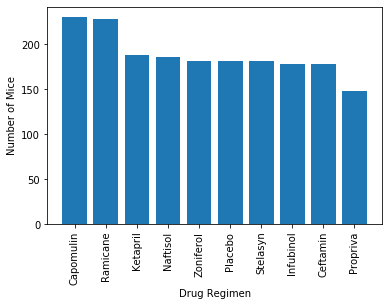

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = Mice_count_for_drug_specimen.index.values
y_axis = Mice_count_for_drug_specimen.values

plt.bar(x_axis, y_axis, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = Clean_dataframe["Sex"].value_counts()
gender

Male      958
Female    922
Name: Sex, dtype: int64

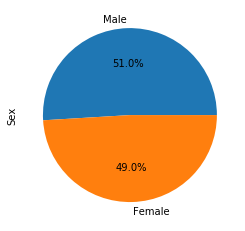

In [17]:
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

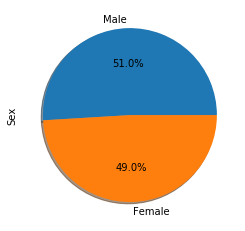

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = Clean_dataframe["Sex"].value_counts()

labels = list(gender_pyplot.index)
distribution_plot = plt.pie(gender_pyplot, labels=labels, 
       autopct="%1.1f%%", shadow=True)

plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_regimen = Clean_dataframe.loc[Clean_dataframe["Drug Regimen"] == "Capomulin",:]
Ramicane_regimen = Clean_dataframe.loc[Clean_dataframe["Drug Regimen"] == "Ramicane", :]
Infubinol_regimen = Clean_dataframe.loc[Clean_dataframe["Drug Regimen"] == "Infubinol", :]
Ceftamin_regimen= Clean_dataframe.loc[Clean_dataframe["Drug Regimen"] == "Ceftamin", :]


In [20]:
Capomulin_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [21]:
Ramicane_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
58,c458,0,45.000000,0,Ramicane,Female,23,20
59,q610,0,45.000000,0,Ramicane,Female,18,21
60,j913,0,45.000000,0,Ramicane,Female,4,17
61,a411,0,45.000000,0,Ramicane,Male,3,22
62,a444,0,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
1867,u196,45,40.667713,3,Ramicane,Male,18,25
1870,g791,45,29.128472,1,Ramicane,Male,11,16
1874,r811,45,37.225650,1,Ramicane,Male,9,19
1879,a644,45,32.978522,1,Ramicane,Female,7,17


In [22]:
Infubinol_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
33,y163,0,45.000000,0,Infubinol,Female,17,27
...,...,...,...,...,...,...,...,...
1789,k483,45,66.196912,3,Infubinol,Female,20,30
1794,a685,45,66.083066,3,Infubinol,Male,8,30
1802,e476,45,62.435404,1,Infubinol,Male,23,26
1804,a203,45,67.973419,2,Infubinol,Female,20,23


In [23]:
Ceftamin_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
170,x822,0,45.000000,0,Ceftamin,Male,3,29
171,l558,0,45.000000,0,Ceftamin,Female,13,30
172,l733,0,45.000000,0,Ceftamin,Female,4,30
173,f436,0,45.000000,0,Ceftamin,Female,3,25
174,l490,0,45.000000,0,Ceftamin,Male,24,26
...,...,...,...,...,...,...,...,...
1858,k210,45,68.923185,3,Ceftamin,Male,15,28
1862,x822,45,61.386660,3,Ceftamin,Male,3,29
1864,l733,45,64.299830,1,Ceftamin,Female,4,30
1872,o287,45,59.741901,4,Ceftamin,Male,2,28


In [24]:
Capomulin_greatest = Capomulin_regimen.groupby('Mouse ID').max()['Timepoint']
Capomulin_tumor_volume = pd.DataFrame(Capomulin_greatest)
Capomulin_merge = pd.merge(Capomulin_tumor_volume, Clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [25]:
Ramicane_greatest = Ramicane_regimen.groupby('Mouse ID').max()['Timepoint']
Ramicane_tumor_volume = pd.DataFrame(Ramicane_greatest)
Ramicane_merge = pd.merge(Ramicane_tumor_volume, Clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [26]:
Infubinol_greatest = Infubinol_regimen.groupby('Mouse ID').max()['Timepoint']
Infubinol_tumor_volume = pd.DataFrame(Infubinol_greatest)
Infubinol_merge = pd.merge(Infubinol_tumor_volume, Clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [27]:
Ceftamin_greatest = Ceftamin_regimen.groupby('Mouse ID').max()['Timepoint']
Ceftamin_tumor_volume = pd.DataFrame(Ceftamin_greatest)
Ceftamin_merge = pd.merge(Ceftamin_tumor_volume, Clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_regimen.head()


Ceftamin_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
170,x822,0,45.000000,0,Ceftamin,Male,3,29
171,l558,0,45.000000,0,Ceftamin,Female,13,30
172,l733,0,45.000000,0,Ceftamin,Female,4,30
173,f436,0,45.000000,0,Ceftamin,Female,3,25
174,l490,0,45.000000,0,Ceftamin,Male,24,26
...,...,...,...,...,...,...,...,...
1858,k210,45,68.923185,3,Ceftamin,Male,15,28
1862,x822,45,61.386660,3,Ceftamin,Male,3,29
1864,l733,45,64.299830,1,Ceftamin,Female,4,30
1872,o287,45,59.741901,4,Ceftamin,Male,2,28


In [28]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [29]:
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [30]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol potential outliers could be values below { lower_bound} and above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [31]:
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin potential outliers could be values below { lower_bound} and above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


In [32]:
tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [33]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = Clean_dataframe.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_lasttp = last_timepoint.merge(Clean_dataframe, on=["Mouse ID", "Timepoint"], how="left")
merged_data_lasttp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


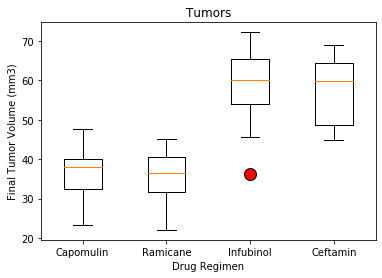

In [34]:
poltting_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
 
labels= ["Capomulin","Ramicane","Infubinol","Ceftamin",]

color = dict(marker='o', markerfacecolor='red', markersize=12, markeredgecolor='black')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(poltting_data, labels=labels,flierprops=color)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

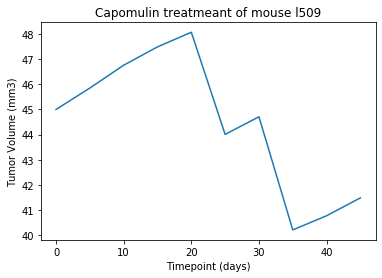

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = Capomulin_regimen.loc[Capomulin_regimen["Mouse ID"] == "l509",:]
line_plot.head()
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

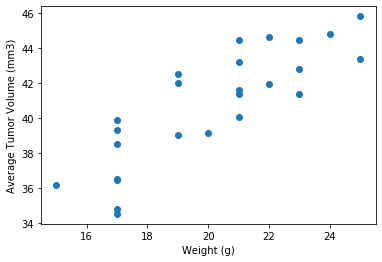

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_tumor_volume =Capomulin_regimen.groupby(['Mouse ID']).mean()
plt.scatter(average_tumor_volume['Weight (g)'],average_tumor_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coefficient = st.pearsonr(average_tumor_volume['Weight (g)'],average_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


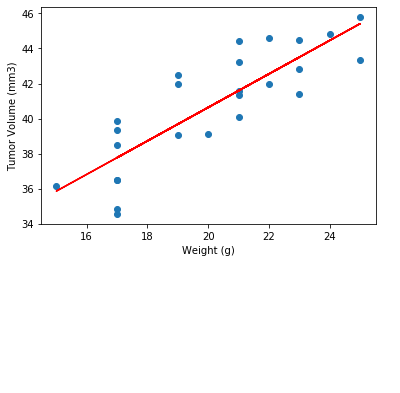

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"])
regress_values = average_tumor_volume["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"])
plt.plot(average_tumor_volume["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=20,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()